In [3]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Machine Learning on Text: Clustering Assignment

In [64]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import (
    PlaintextCorpusReader,
    CategorizedPlaintextCorpusReader,
)
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Ingest the company_profiles data set into a corpus.

In [9]:
PATH = "corpata/company_profiles"

DOC_PATTERN = r".*\.txt"

corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Create a list of documents by extracting the raw text for each fileid in the corpus.

In [0]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]

### Preprocess the documents, including the steps below.

- Word tokenize the document.
- Lowercase all tokens.
- Lemmatize and stem the tokens.
- Remove stop words and punctuation.

In [11]:
def preprocess(docs):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer("english")
    preprocessed = []

    for doc in docs:
        tokenized = word_tokenize(doc)

        cleaned = [
            stemmer.stem(lemmatizer.lemmatize(token.lower()))
            for token in tokenized
            if not token.lower() in stopwords.words("english")
            if token.isalpha()
        ]
        untokenized = " ".join(cleaned)
        preprocessed.append(untokenized)

    return preprocessed

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
preprocessed = preprocess(docs)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### TF-IDF vectorize the preprocessed documents.

In [40]:
tfidf = TfidfVectorizer(min_df=2)
vectorized = tfidf.fit_transform(preprocessed)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
tfidf_df = pd.DataFrame(vectorized.toarray(), columns=tfidf.get_feature_names())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
tfidf_df

,aaa,aac,aaron,aav,ab,abandon,abat,abbott,abbvi,abc,...,zinc,zion,ziopharm,zip,zirconium,zodiac,zogenix,zolmitriptan,zone,zurich
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.250772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3554,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.331856,0.0,0.0
3555,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3556,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
model = KMeans(n_clusters=5)
clusters = model.fit_predict(vectorized.toarray())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
df = pd.DataFrame([clusters, corpus.fileids()]).T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
df[0].value_counts()

2    2236
4     372
1     337
0     337
3     276
Name: 0, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Determine the optimal number of clusters using the Yellowbrick library's KElbow Visualizer and a KMeans clustering algorithm.

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AF8369488>,
                 k=None, locate_elbow=True, metric='silhouette', model=None,
                 timings=True)

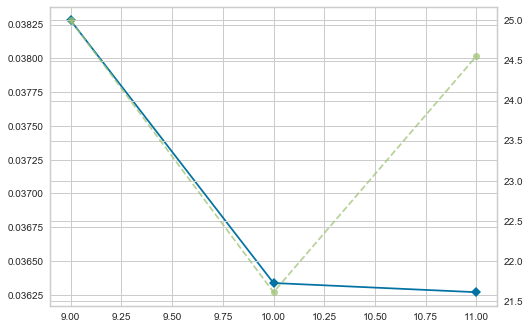

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
model = KMeans(n_jobs=-1)
visualizer = KElbowVisualizer(model=model, k=(9, 12), metric="silhouette",)

visualizer.fit(vectorized)

### Perform K-Means Clustering using the optimal number of clusters determine in the previous step.

In [49]:
model = KMeans(n_clusters=9, n_jobs=-1)
clusters = model.fit_predict(vectorized.toarray())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
df = pd.DataFrame([clusters, corpus.fileids()]).T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
df[0].value_counts()

6    1039
5     563
3     552
1     365
2     308
0     260
8     235
7     135
4     101
Name: 0, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Perform Agglomerative Clustering using the same number of clusters.

In [55]:
model = AgglomerativeClustering(n_clusters=9)
clusters_2 = model.fit_predict(vectorized.toarray())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
df_2 = pd.DataFrame([clusters_2, corpus.fileids()]).T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
df_2[0].value_counts()

1    1303
8     575
3     373
7     351
5     344
4     211
0     190
2     136
6      75
Name: 0, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Choose one of the three topic modeling approaches covered. Cluster into the optimal number of clusters and extract 5 keywords that represent the documents in each cluster.

In [65]:
num_keywords = 5
num_topics = 9

vectorizer = TfidfVectorizer()
model = NMF(n_components=num_topics)

vectorized = vectorizer.fit_transform(preprocessed)
model.fit_transform(vectorized)

results = [[(vectorizer.get_feature_names()[i], topic[i]) 
            for i in topic.argsort()[:-num_keywords - 1:-1]] 
           for topic in model.components_]

topics = [[x[0] for x in i] for i in results]
topics

[['loan', 'bank', 'deposit', 'account', 'commerci'],
 ['servic', 'solut', 'manag', 'provid', 'softwar'],
 ['gas', 'natur', 'oil', 'energi', 'texa'],
 ['invest', 'fund', 'equiti', 'incom', 'stock'],
 ['treatment', 'phase', 'clinic', 'trial', 'develop'],
 ['system', 'product', 'manufactur', 'industri', 'segment'],
 ['insur', 'life', 'liabil', 'product', 'casualti'],
 ['store', 'brand', 'product', 'retail', 'oper'],
 ['properti', 'real', 'estat', 'invest', 'trust']]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
vectorizer = CountVectorizer()
model = LatentDirichletAllocation(n_components=num_topics, learning_method='online')

vectorized = vectorizer.fit_transform(preprocessed)
model.fit_transform(vectorized)

results = [[(vectorizer.get_feature_names()[i], topic[i]) 
            for i in topic.argsort()[:-num_keywords - 1:-1]] 
           for topic in model.components_]

topics = [[x[0] for x in i] for i in results]
topics

[['servic', 'compani', 'manag', 'provid', 'solut'],
 ['compani', 'develop', 'treatment', 'clinic', 'phase'],
 ['product', 'insur', 'compani', 'provid', 'health'],
 ['product', 'system', 'manufactur', 'segment', 'compani'],
 ['brand', 'store', 'product', 'retail', 'compani'],
 ['qad', 'funer', 'cruis', 'cemeteri', 'trex'],
 ['loan', 'servic', 'compani', 'bank', 'commerci'],
 ['food', 'product', 'beverag', 'casino', 'groceri'],
 ['compani', 'oper', 'gas', 'servic', 'oil']]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [67]:
num_keywords = 5
num_topics = 9

vectorizer = TfidfVectorizer()
model = TruncatedSVD(n_components=num_topics)

vectorized = vectorizer.fit_transform(preprocessed)
model.fit_transform(vectorized)

results = [[(vectorizer.get_feature_names()[i], topic[i]) 
            for i in topic.argsort()[:-num_keywords - 1:-1]] 
           for topic in model.components_]

topics = [[x[0] for x in i] for i in results]
topics

[['loan', 'servic', 'bank', 'compani', 'product'],
 ['loan', 'bank', 'deposit', 'account', 'estat'],
 ['gas', 'natur', 'oil', 'energi', 'texa'],
 ['invest', 'fund', 'incom', 'manag', 'equiti'],
 ['treatment', 'phase', 'clinic', 'trial', 'develop'],
 ['servic', 'manag', 'insur', 'solut', 'gas'],
 ['insur', 'store', 'product', 'properti', 'liabil'],
 ['insur', 'segment', 'life', 'system', 'liabil'],
 ['properti', 'real', 'estat', 'insur', 'reit']]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>